In [1]:
# 1. Simulation model
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

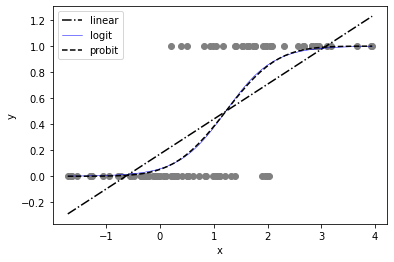

In [2]:
np.random.seed(1234567)

y = stats.binom.rvs(1, 0.5, size=100)
x = stats.norm.rvs(0, 1, size=100) +2*y
sim_data = pd.DataFrame({'y': y, 'x': x})

reg_lin = smf.ols(formula='y~x', data=sim_data)
results_lin = reg_lin.fit()
reg_logit = smf.logit(formula='y~x', data=sim_data)
results_logit = reg_logit.fit(disp=0)
reg_probit = smf.probit(formula='y~x', data=sim_data)
results_probit = reg_probit.fit(disp=0)

X_new = pd.DataFrame ({'x': np.linspace(min(x), max(x), 50)})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

plt.plot (x, y, color='grey', marker='o', linestyle='')
plt.plot (X_new['x'], predictions_lin, color='black', linestyle='-.', label='linear')
plt.plot (X_new['x'], predictions_logit, color='blue', linestyle='solid', linewidth=0.5, label='logit')
plt.plot (X_new['x'], predictions_probit, color='black', linestyle='--', label='probit')
plt.ylabel('y')
plt.xlabel('x')
plt.xlabel('x')
plt.legend()

In [3]:
# 2. Linear model
import wooldridge as woo
import pandas as pd
import statsmodels. formula.api as smf

mroz = woo.dataWoo('mroz')

reg_lin = smf.ols(formula = 'inlf ~ nwifeinc + educ + exper + I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')

table = pd.DataFrame ({'b': round(results_lin.params, 3),'se': round(results_lin.bse, 3),'t': round(results_lin.tvalues, 3), 
                     'pval': round(results_lin.pvalues, 3)})
print (f'table: \n{table}\n')

X_new = pd.DataFrame (
    {'nwifeinc': [100, 0], 'educ': [5, 17], 'exper': [0,30] 
     ,'age': [20,52],'kidslt6': [2,0], 'kidsge6': [0,0]})
predictions = results_lin.predict(X_new)
print (f'predictions: \n{predictions}\n')

table: 
                   b     se      t   pval
Intercept      0.586  0.154  3.812  0.000
nwifeinc      -0.003  0.002 -2.185  0.029
educ           0.038  0.007  5.177  0.000
exper          0.039  0.006  6.600  0.000
I(exper ** 2) -0.001  0.000 -2.997  0.003
age           -0.016  0.002 -6.664  0.000
kidslt6       -0.262  0.032 -8.143  0.000
kidsge6        0.013  0.014  0.953  0.341

predictions: 
0   -0.410458
1    1.042808
dtype: float64



In [4]:
# 3. Probit model

import wooldridge as woo
import pandas as pd
import statsmodels. formula.api as smf

mroz = woo.dataWoo('mroz')

reg_probit = smf.probit(formula = 'inlf ~ nwifeinc + educ + exper + I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
results_probit = reg_probit.fit(disp=0)
print (f'results_probit.summary(): \n{results_probit.summary()}\n')

print (f'results_probit.llf: {results_probit.llf}\n')
print (f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Mar 2022   Pseudo R-squ.:                  0.2206
Time:                        13:32:22   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 2.009e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2701      0.509      0.531      0.595      -0.727       1.267
nwifeinc         -0.0120      0.005     -2.484      0.013      -0.022      -0.003
educ         

In [15]:
# 4. Logit model

import wooldridge as woo
import pandas as pd
import statsmodels. formula.api as smf

mroz = woo.dataWoo('mroz')

reg_logit = smf.logit(formula = 'inlf ~ nwifeinc + educ + exper + I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
results_logit = reg_logit.fit(disp=0)
print (f'results_logit.summary(): \n{results_logit.summary()}\n')

print (f'results_logit.llf: {results_logit.llf}\n')
print (f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 20 Mar 2022   Pseudo R-squ.:                  0.2197
Time:                        13:33:56   Log-Likelihood:                -401.77
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.159e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4255      0.860      0.494      0.621      -1.261       2.112
nwifeinc         -0.0213      0.008     -2.535      0.011      -0.038      -0.005
educ          